In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import os

%matplotlib inline

In [118]:
# Task 1: Import Data
import os
print(os.getcwd())
df = pd.read_csv('Downloads/input/20112018-salaries-for-san-francisco/Total.csv', low_memory=False)

C:\Users\Admin


In [119]:
# Display dataset basic data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312882 non-null  object 
 3   OvertimePay       312882 non-null  object 
 4   OtherPay          312882 non-null  object 
 5   Benefits          312882 non-null  object 
 6   TotalPay          312882 non-null  float64
 7   TotalPayBenefits  312882 non-null  float64
 8   Year              312882 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 21.5+ MB


EmployeeName                                        JobTitle  \
0     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay OvertimePay   OtherPay      Benefits   TotalPay  \
0  167411.18        0.00  400184.25  Not Provided  567595.43   
1  155966.02   245131.88  137811.38  Not Provided  538909.28   
2  212739.13   106088.18   16452.60  Not Provided  335279.91   
3   77916.00    56120.71  198306.90  Not Provided  332343.61   
4  134401.60     9737.00  182234.59  Not Provided  326373.19   

   TotalPayBenefits  Year  
0         567595.43  2011  
1         538909.28  2011  
2         335279.91  2011  
3         332343.61  2011  
4         326373.19  2011

In [120]:
print('This Dataset contains {} Rows and {} Columns'.format(df.shape[0], df.shape[1]))

This Dataset contains 312882 Rows and 9 Columns


In [143]:
# Convert columns to float64
series_list = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']
for series in series_list:
    df[series] = pd.to_numeric(df[series], errors='coerce')

In [122]:
# Confirm columns conversion and display descriptive data
df.info()
df[['BasePay', 'TotalPay', 'Benefits', 'OvertimePay', 'OtherPay', 'TotalPayBenefits']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312276 non-null  float64
 3   OvertimePay       312881 non-null  float64
 4   OtherPay          312881 non-null  float64
 5   Benefits          276722 non-null  float64
 6   TotalPay          312882 non-null  float64
 7   TotalPayBenefits  312882 non-null  float64
 8   Year              312882 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 21.5+ MB


BasePay       TotalPay       Benefits    OvertimePay  \
count  312276.000000  312882.000000  276722.000000  312881.000000   
mean    69808.257496   78802.645788   25016.917292    5668.929393   
std     45376.929428   53230.758542   15089.077103   12745.655309   
min      -474.400000    -618.130000  -13939.420000    -292.800000   
25%     35722.365000   38803.000000   12729.762500       0.000000   
50%     67710.450000   74908.790000   28327.330000       0.000000   
75%     99312.302500  111386.897500   35268.162500    5223.120000   
max    592394.340000  592394.340000  125891.730000  309481.030000   

            OtherPay  TotalPayBenefits  
count  312881.000000     312882.000000  
mean     3460.694974     100928.339777  
std      7387.263120      66485.186495  
min     -7058.590000      -3628.780000  
25%         0.000000      48955.072500  
50%       728.000000     100011.290000  
75%      3958.680000     142376.300000  
max    400184.250000     712802.360000

In [123]:
# Number of unique years in the dataset
A = df['Year'].nunique()
B = df['Year'].unique()
print('The information of {} years are available in the dataset:{}'.format(A, B))

The information of 8 years are available in the dataset:[2011 2012 2013 2014 2015 2016 2017 2018]


<Axes: xlabel='TotalPay', ylabel='Density'>

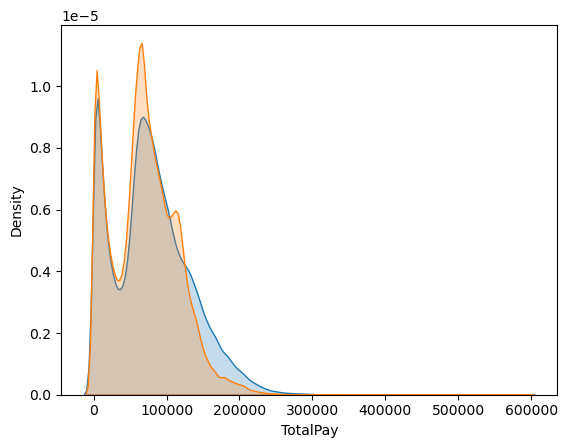

In [124]:
# Visualizations of TotalPay and BasePay
sns.kdeplot(df['TotalPay'], fill=True)
sns.kdeplot(df['BasePay'], fill=True)

In [125]:
# Barplot of yearly TotalPay
sns.barplot(data=df, x='Year', y='TotalPay')

<Axes: xlabel='Year', ylabel='TotalPay'>

In [126]:
# Number of yearly unique job titles
df.groupby('Year').nunique()['JobTitle']

Year
2011    1045
2012    1044
2013    1051
2014     996
2015    1010
2016    1009
2017    1017
2018    1000
Name: JobTitle, dtype: int64

In [127]:
# Display yearly unique job titles
print(df.groupby('Year').nunique()['JobTitle'])

Year
2011    1045
2012    1044
2013    1051
2014     996
2015    1010
2016    1009
2017    1017
2018    1000
Name: JobTitle, dtype: int64


In [137]:
# Task 2: Create Employee Function
def get_employee_details(name):
    try:
        employee = df[df['EmployeeName'].str.lower() == name.lower()]
        if employee.empty:
            return "Employee not found in the dataset."
        else:
            return employee
    except Exception as e:
        return f"Error occurred: {e}"

In [141]:
# Usage case
print(get_employee_details('Nathaniel Ford'))

     EmployeeName                                        JobTitle    BasePay  \
0  NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  167411.18   

   OvertimePay   OtherPay  Benefits   TotalPay  TotalPayBenefits  Year  
0          0.0  400184.25       NaN  567595.43         567595.43  2011  


In [144]:
# Usage case of processing the dictionary
processed_data = {}
for employee in salary_dict:
    # Add any additional processing here
    name = employee['EmployeeName']
    processed_data[name] = {
        'BasePay': employee['BasePay'],
        'TotalPay': employee['TotalPay'],
        'Benefits': employee['Benefits'],
        'OvertimePay': employee['OvertimePay'],
        'OtherPay': employee['OtherPay']
    }

In [140]:
# Task 4: Error Handling
def secure_get_employee_details(name):
    try:
        employee = df[df['EmployeeName'].str.lower() == name.lower()]
        if employee.empty:
            return "Employee not found in the dataset."
        else:
            return employee
    except Exception as e:
        return f"Error occurred: {e}"

In [142]:
# Usage case with error handling
print(secure_get_employee_details('Gary Gimenez'))

Employee not found in the dataset.


In [145]:
# Task 5: Export Employee Details to CSV and Zip
# Funcion to export employee details to CSV and zip it
def export_employee_details(name):
    employee = secure_get_employee_details(name)
    if isinstance(employee, pd.DataFrame):
        # Ensuring the output directory exists
        os.makedirs('Employee_Profile', exist_ok=True)
        
        # Create the CSV filename
        filename = f"{name.replace(' ', '_')}_details.csv"
        filepath = os.path.join('Employee_Profile', filename)
        
        # Export employee details to CSV
        employee.to_csv(filepath, index=False)
        
        # Create the zip file
        zip_filepath = 'Employee_Profile.zip'
        with zipfile.ZipFile(zip_filepath, 'w') as zipf:
            zipf.write(filepath, arcname=filename)

        # Remove the CSV file after zipping
        os.remove(filepath)
        
        return f"{filename} exported and zipped as {zip_filepath}"
    else:
        return employee

In [146]:
# Usage case
print(export_employee_details('Jane Doe'))

Jane_Doe_details.csv exported and zipped as Employee_Profile.zip
